In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [44]:
# Use index_col=0 to specify the index from csv file
#data= pd.read_csv("flats_moscow_a.csv", index_col=0)
data= pd.read_csv("flats_moscow_a.csv")
data.head()

,Unnamed: 0,price,brick,metro,kitsp,dist,walk,livesp,floor,code,totsp,owners,parking,lastownage,rating,murder,class
0,1,81.0,monolit,Zamoskvoreckaya,6.0,12.5,15.0,40.0,0.0,northwest,58.0,3,opened,56,1,0,Usual
1,2,75.0,block,Tagansko-Krasnopresenskaya,6.0,13.5,24.0,28.0,0.0,southeast,44.0,2,opened,40,1,1,Usual
2,3,128.0,monolit,Zamoskvoreckaya,6.0,14.5,20.0,42.0,7.0,northwest,70.0,3,closed,43,1,0,Usual
3,4,95.0,panel,Kalugsko-Rigskaya,6.0,13.5,19.0,37.0,6.0,north,61.0,1,opened,77,1,0,Usual
4,5,330.0,brick,Zamoskvoreckaya,11.0,10.5,0.0,60.0,8.0,northwest,104.0,2,opened,48,3,0,Usual


In [45]:
data["brick"].isnull()
# Use iteration instead of hardcode - just a coding tip, not ML.
data["brick"].fillna(value="missing",inplace=True)
data["metro"].fillna(value="missing",inplace=True)
data["code"].fillna(value="missing",inplace=True)
data["parking"].fillna(value="missing",inplace=True)
data["class"].fillna(value="missing",inplace=True)


from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
# LabelEncoder just can be applied to the whole DataSet, without specifying any columns
#data = data.apply(encoder.fit_transform)
data["brick"]=encoder.fit_transform(data["brick"])
data["metro"]=encoder.fit_transform(data["metro"])
data["code"]=encoder.fit_transform(data["code"])
data["parking"]=encoder.fit_transform(data["parking"])
data["class"]=encoder.fit_transform(data["class"])
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [46]:
data.head()

,Unnamed: 0,price,brick,metro,kitsp,dist,walk,livesp,floor,code,totsp,owners,parking,lastownage,rating,murder,class
0,1,81.0,3,6,6.0,12.5,15.0,40.0,0.0,3,58.0,3,1,56,1,0,1
1,2,75.0,0,5,6.0,13.5,24.0,28.0,0.0,4,44.0,2,1,40,1,1,1
2,3,128.0,3,6,6.0,14.5,20.0,42.0,7.0,3,70.0,3,0,43,1,0,1
3,4,95.0,4,2,6.0,13.5,19.0,37.0,6.0,2,61.0,1,1,77,1,0,1
4,5,330.0,1,6,11.0,10.5,0.0,60.0,8.0,3,104.0,2,1,48,3,0,1


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687 entries, 0 to 2039
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1687 non-null   int64  
 1   price       1687 non-null   float64
 2   brick       1687 non-null   int64  
 3   metro       1687 non-null   int64  
 4   kitsp       1687 non-null   float64
 5   dist        1687 non-null   float64
 6   walk        1687 non-null   float64
 7   livesp      1687 non-null   float64
 8   floor       1687 non-null   float64
 9   code        1687 non-null   int64  
 10  totsp       1687 non-null   float64
 11  owners      1687 non-null   int64  
 12  parking     1687 non-null   int64  
 13  lastownage  1687 non-null   int64  
 14  rating      1687 non-null   int64  
 15  murder      1687 non-null   int64  
 16  class       1687 non-null   int64  
dtypes: float64(7), int64(10)
memory usage: 237.2 KB


In [48]:
# Greate method of DataFrame, nice that you've used it!
data.describe()

,Unnamed: 0,price,brick,metro,kitsp,dist,walk,livesp,floor,code,totsp,owners,parking,lastownage,rating,murder,class
count,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.00000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000
mean,1022.675163,128.365738,2.017190,3.410196,8.921162,10.962418,17.348548,46.344991,3.553646,2.410196,73.22703,1.951986,1.006520,52.423237,1.498518,0.045050,0.989330
std,595.037473,52.345663,1.717004,1.921988,2.780739,3.408074,8.174877,7.916798,3.146379,1.432992,15.25571,0.805935,0.821901,14.953780,0.542252,0.207476,0.102773
min,1.000000,50.000000,0.000000,0.000000,5.000000,3.000000,0.000000,28.000000,0.000000,0.000000,44.00000,1.000000,0.000000,23.000000,1.000000,0.000000,0.000000
25%,504.500000,95.000000,0.000000,2.000000,7.000000,9.000000,12.000000,42.000000,0.000000,2.000000,62.00000,1.000000,0.000000,40.000000,1.000000,0.000000,1.000000
50%,1024.000000,115.000000,2.000000,3.000000,9.000000,12.000000,19.000000,45.000000,3.000000,3.000000,74.00000,2.000000,1.000000,53.000000,1.000000,0.000000,1.000000
75%,1546.500000,145.000000,4.000000,5.000000,10.000000,13.000000,24.000000,50.000000,6.000000,4.000000,80.00000,3.000000,2.000000,64.000000,2.000000,0.000000,1.000000
max,2040.000000,730.000000,4.000000,6.000000,25.000000,17.000000,29.000000,102.000000,9.000000,4.000000,192.00000,3.000000,2.000000,82.000000,5.000000,1.000000,1.000000


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

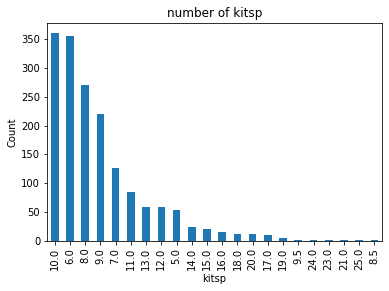

In [49]:
data['kitsp'].value_counts().plot(kind='bar')
plt.title('number of kitsp')
plt.xlabel('kitsp')
plt.ylabel('Count')
sns.despine

Text(0.5, 1.0, 'Price vs kitsp')

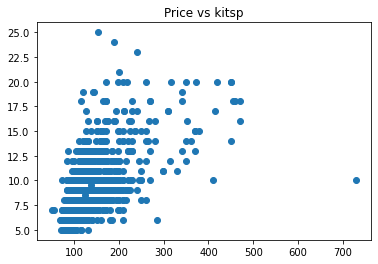

In [50]:
plt.scatter(data.price,data.kitsp)
plt.title("Price vs kitsp")

Text(0.5, 1.0, 'Price vs dist')

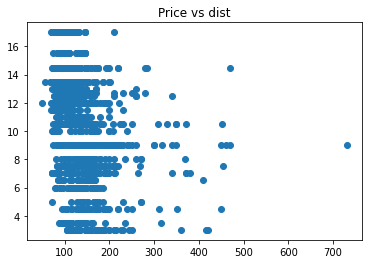

In [51]:
plt.scatter(data.price,data.dist)
plt.title("Price vs dist")

Text(0.5, 1.0, 'Latitude vs walk')

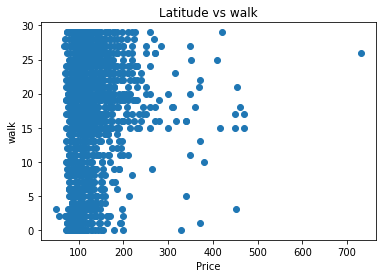

In [52]:
plt.scatter(data.price,data.walk)
plt.xlabel("Price")
plt.ylabel('walk')
plt.title("Latitude vs walk")

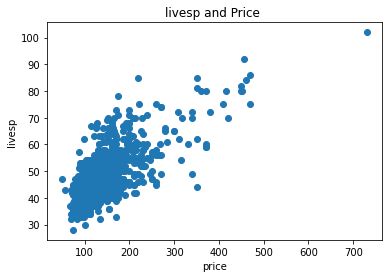

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [53]:
plt.scatter(data.price,data.livesp)
plt.title("livesp and Price ")
plt.xlabel("price")
plt.ylabel("livesp")
plt.show()
sns.despine

Text(0.5, 1.0, 'Latitude vs floor')

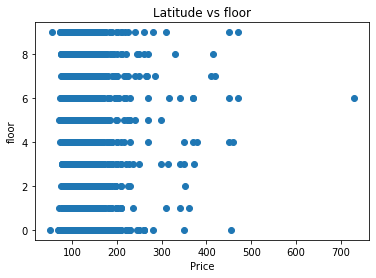

In [54]:
plt.scatter(data.price,data.floor)
plt.xlabel("Price")
plt.ylabel('floor')
plt.title("Latitude vs floor")

Text(0.5, 1.0, 'Latitude vs totsp')

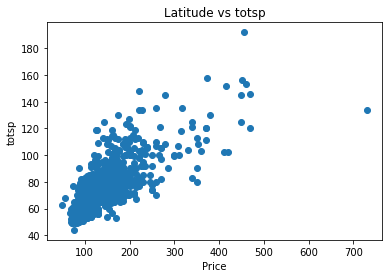

In [55]:
plt.scatter(data.price,data.totsp)
plt.xlabel("Price")
plt.ylabel('totsp')
plt.title("Latitude vs totsp")

Text(0.5, 1.0, 'Latitude vs owners')

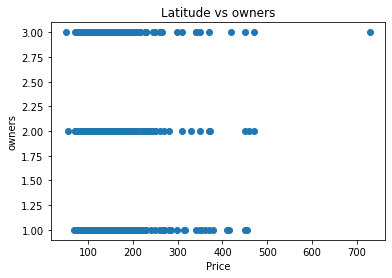

In [56]:
plt.scatter(data.price,data.owners)
plt.xlabel("Price")
plt.ylabel('owners')
plt.title("Latitude vs owners")

Text(0.5, 1.0, 'Latitude vs lastownage')

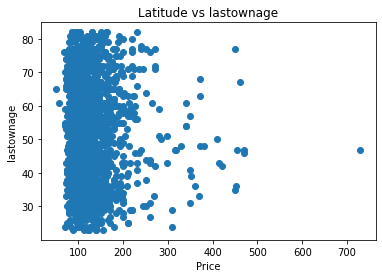

In [57]:
plt.scatter(data.price,data.lastownage)
plt.xlabel("Price")
plt.ylabel('lastownage')
plt.title("Latitude vs lastownage")

Text(0.5, 1.0, 'Latitude vs rating')

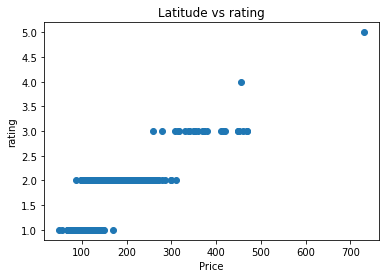

In [58]:
plt.scatter(data.price,data.rating)
plt.xlabel("Price")
plt.ylabel('rating')
plt.title("Latitude vs rating")

Text(0.5, 1.0, 'Latitude vs murder')

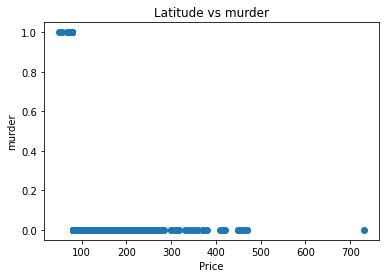

In [59]:
plt.scatter(data.price,data.murder)
plt.xlabel("Price")
plt.ylabel('murder')
plt.title("Latitude vs murder")

Text(0.5, 1.0, 'Price vs parking')

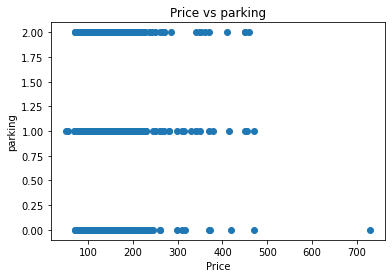

In [60]:
plt.scatter(data.price,data.parking)
plt.xlabel("Price")
plt.ylabel('parking')
plt.title("Price vs parking")

Text(0.5, 1.0, 'Price vs brick')

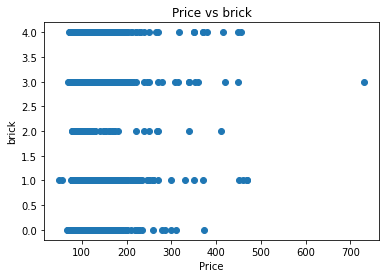

In [61]:
plt.scatter(data.price,data.brick)
plt.xlabel("Price")
plt.ylabel('brick')
plt.title("Price vs brick")

Text(0.5, 1.0, 'Price vs metro')

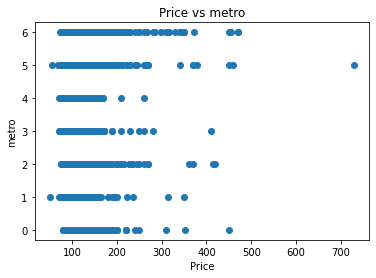

In [62]:
plt.scatter(data.price,data.metro)
plt.xlabel("Price")
plt.ylabel('metro')
plt.title("Price vs metro")

In [63]:
train1 = data.drop(['Unnamed: 0', 'price'],axis=1)

In [64]:
train1.head()

,brick,metro,kitsp,dist,walk,livesp,floor,code,totsp,owners,parking,lastownage,rating,murder,class
0,3,6,6.0,12.5,15.0,40.0,0.0,3,58.0,3,1,56,1,0,1
1,0,5,6.0,13.5,24.0,28.0,0.0,4,44.0,2,1,40,1,1,1
2,3,6,6.0,14.5,20.0,42.0,7.0,3,70.0,3,0,43,1,0,1
3,4,2,6.0,13.5,19.0,37.0,6.0,2,61.0,1,1,77,1,0,1
4,1,6,11.0,10.5,0.0,60.0,8.0,3,104.0,2,1,48,3,0,1


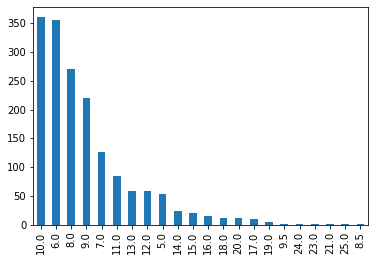

In [65]:
data.kitsp.value_counts().plot(kind='bar')

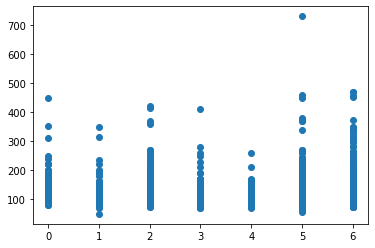

In [66]:
plt.scatter(data.metro,data.price)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
reg = LinearRegression()

In [69]:
labels = data['price']
train1 = data.drop(['Unnamed: 0', 'price'],axis=1)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.3,random_state =2)

In [72]:
reg.fit(x_train,y_train)

LinearRegression()

In [73]:
reg.score(x_test,y_test)

0.8329062918742152

<font color='red'>*Actually only one score is not the best idea to check how dooes your model works. It's better to use several of them such as MSE, MAE, R2. Additionally you should plot the result of your prediction just to check how does your data is predicted. I hoped you would create the programm which will predict the new value.* </font>

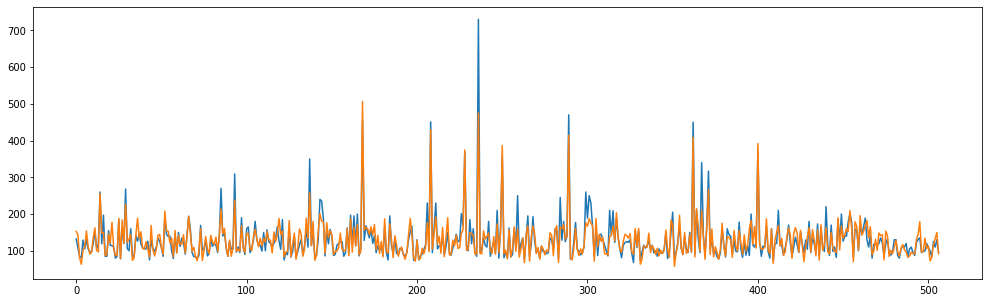

In [87]:
# Great that it is not very difficult, just use the method "predict"
# So, applying it you will see how does your model work with specific data
plt.figure(figsize=(17,5))
plt.plot(list(y_test))
plt.plot(reg.predict(x_test))

In [79]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.2, loss = 'ls')

In [80]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=400)

In [81]:
clf.score(x_test,y_test)

0.8441260987904786

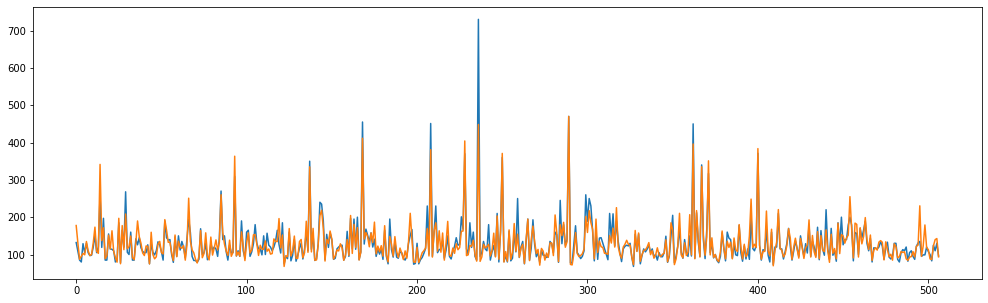

In [82]:
# Same idea, now you can see thet in some points thod model works better
# You could see it if you use MAE, MSE and R2 together + ploting the data for more native representation.
plt.figure(figsize=(17,5))
plt.plot(list(y_test))
plt.plot(clf.predict(x_test))

<font color='red'>*The prediction result is good, but it can be adjusted via hyperparameters search. For that GridSearch can be used.*